In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

#Decision Tree Assignment

In [3]:
titanic=sns.load_dataset('titanic')

#Based on the assignment, we use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), 
#and Fare to predict whether a passenger survived.

In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#We are only taking those columns as suggested in the assignment

In [7]:
titan=titanic[['pclass','sex','age','sibsp','parch','fare','survived']]

In [8]:
titan.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [9]:
titan.describe()

,pclass,age,sibsp,parch,fare,survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [11]:
titan.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


#Checking the cardinality of the variables

In [13]:
c=list(titan.columns)

In [14]:
c

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']

In [15]:
for i in c:
    
    print(len(titan[i].value_counts()),' ',i)

3   pclass
2   sex
88   age
7   sibsp
7   parch
248   fare
2   survived


#Changing the "Sex" variable from categorical to numerical . Male =1 & female=0

In [17]:
titan['sex']=titan['sex'].map({'male':1,'female':0})

In [18]:
titan.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [19]:
titan.isnull().sum()

pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
survived      0
dtype: int64

#Checking the age distribution

<AxesSubplot:xlabel='age'>

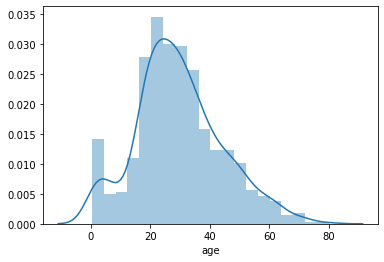

In [21]:
sns.distplot(titan.age)

#Replacing the Nan values of age by median

In [23]:
titan['age']=titan['age'].fillna(titan['age'].median())

#checking if the nan values got replaced by median

In [25]:
titan.age.isnull().sum()

0

<AxesSubplot:xlabel='age'>

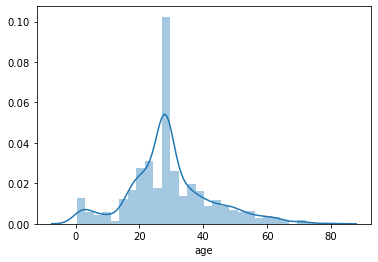

In [26]:
sns.distplot(titan.age)

#There seems to be a little improvement in the curve

In [28]:
titan.head()

,pclass,sex,age,sibsp,parch,fare,survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


#Checking on the number of categories in the survived colums

In [30]:
titan.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#Checking the Correlations with all the variables using pairplot

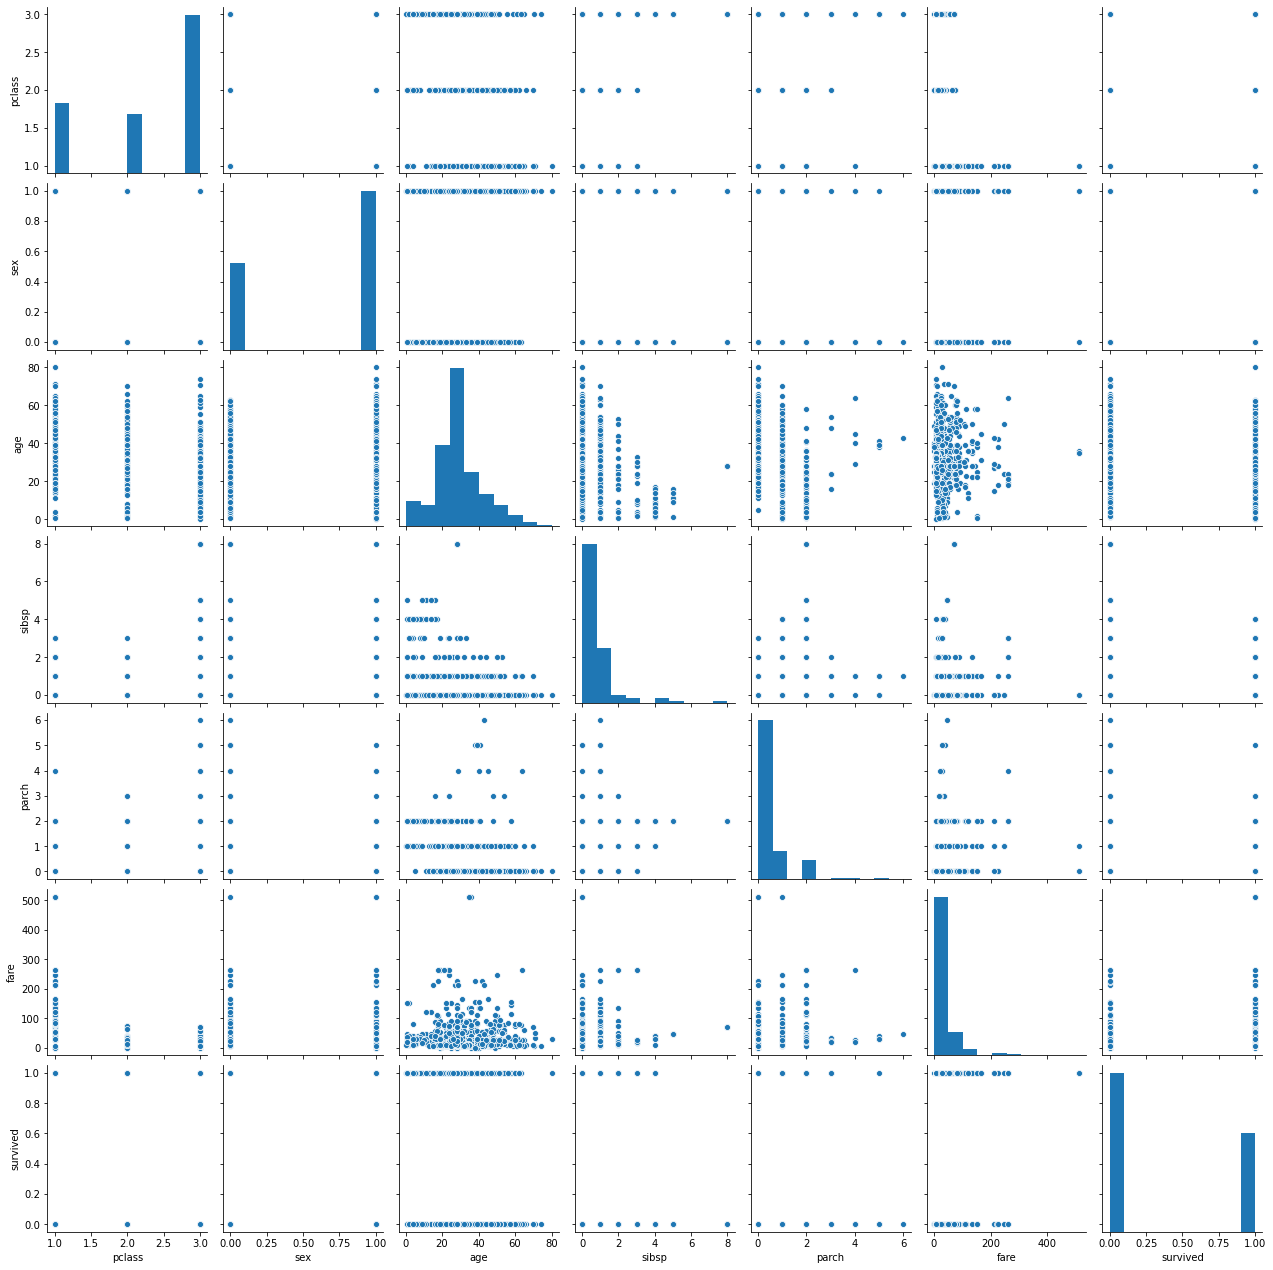

In [32]:
sns.pairplot(titan)
plt.show()

#Dividing the dataset into train & test for the Decision tree algorithm

In [34]:
X=titan.drop(columns=['survived'])

In [35]:
Y=titan['survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainX,testX,trainY,testY=train_test_split(X,Y,test_size=0.3,random_state=342)

In [38]:
DTClassifier=DecisionTreeClassifier()

In [39]:
DTClassifier.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#Checking the accuracy for the training Model

In [41]:
Train_DT=pd.DataFrame({'act':trainY,'pred':DTClassifier.predict(trainX)})

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [43]:
accuracy_score(Train_DT.act,Train_DT.pred)

0.9823434991974318

In [44]:
confusion_matrix(Train_DT.act,Train_DT.pred)

array([[376,   1],
       [ 10, 236]], dtype=int64)

#F1 Score for training set

In [46]:
f1_score(Train_DT.act,Train_DT.pred)

0.9772256728778469

#Classification Report for Training data

In [48]:
print(classification_report(Train_DT.act,Train_DT.pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       377
           1       1.00      0.96      0.98       246

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



#CHecking the accuracy for the testing model 

In [50]:
Test_DT=pd.DataFrame({'act':testY,'pred':DTClassifier.predict(testX)})

In [51]:
accuracy_score(Test_DT.act,Test_DT.pred)

0.8022388059701493

In [52]:
confusion_matrix(Test_DT.act,Test_DT.pred)

array([[147,  25],
       [ 28,  68]], dtype=int64)

#F1 score for testing Data Set

In [54]:
f1_score(Test_DT.act,Test_DT.pred)

0.7195767195767196

#Classification Report for the Testing Data

In [56]:
print(classification_report(Test_DT.act,Test_DT.pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       172
           1       0.73      0.71      0.72        96

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



#Using Grid search to make Hyper parameter tuning as the earlier ,model seems to overfit. 

In [57]:
print(dir(DecisionTreeClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_validate_X_predict', 'apply', 'cost_complexity_pruning_path', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [ ]:
DecisionTreeClassifier

In [ ]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
from sklearn.model_selection import GridSearchCV

In [72]:
DT_Class=DecisionTreeClassifier()

In [80]:
param_grid={'criterion':['gini','entropy'],'max_depth':list(range(2,10))}

In [81]:
Hyper_Class=GridSearchCV(DT_Class,param_grid,cv=10)

In [88]:
Hyper_Class.fit(trainX,trainY)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [89]:
Hyper_Class.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [137]:
#Accuracy Score for the Training Model (Hyper Tuned)

In [138]:
accuracy_score(trainY,Hyper_Class.predict(trainX))

0.8940609951845907

#Confusion Matrix for the Training Data with Hyper parameter Tuning

In [94]:
confusion_matrix(trainY,Hyper_Class.predict(trainX))

array([[369,   8],
       [ 58, 188]], dtype=int64)

#F1 Score for the Traing Data

In [95]:
f1_score(trainY,Hyper_Class.predict(trainX))

0.8506787330316743

#Area under AOC curve

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
roc_auc_score(trainY,Hyper_Class.predict(trainX))

0.8715037415626145

#Classification Report for the Training Data with HyperParameter Tuning

In [98]:
print(classification_report(trainY,Hyper_Class.predict(trainX)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       377
           1       0.96      0.76      0.85       246

    accuracy                           0.89       623
   macro avg       0.91      0.87      0.88       623
weighted avg       0.90      0.89      0.89       623



#Testing the Hyper Parameter with Grid serach with Testing Data

In [91]:
accuracy_score(testY,Hyper_Class.predict(testX))

0.8283582089552238

#We have a very near Testing accuracy compared to the Training Data. 
#We will compute other metrics as well with the Testing Data

#Confusion Matrix for the Testing Data for the Hyper Parameter tuned Testing Data

In [99]:
confusion_matrix(testY,Hyper_Class.predict(testX))

array([[154,  18],
       [ 28,  68]], dtype=int64)

#F1 Score for the Testing Data (Hyper tuned model)

In [101]:
f1_score(testY,Hyper_Class.predict(testX))

0.7472527472527473

#We have close to 10% difference in the F1 score for the Training & Testing Data.
#However, it isn't significantly large & hence we proceed forward. 

#Calculating AOC

In [104]:
roc_auc_score(testY,Hyper_Class.predict(testX))

0.8018410852713179

#Again, not much difference in the Training & Testing Data(Hyper tuned). We will proceed withthe Classification Report

In [107]:
print(classification_report(testY,Hyper_Class.predict(testX)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       172
           1       0.79      0.71      0.75        96

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



#Finally, we seem to have a stable accuracy with the HyperTuned model & hence we would proceed forward with this model. 

#Just to test, we will try giving random values just to see its working. 

In [114]:
Hyper_Class.predict([[3,1,22,1,0,7.2]])[0]

0

In [116]:
Hyper_Class.predict([[1,0,38,1,0,71.2]])[0]

1

#Now, we will store this model in pickle file so that we can deploy in production

In [118]:
import pickle

In [119]:
with open('TITAN.pickle','wb') as f:
    pickle.dump(Hyper_Class,f)

In [120]:
#Testing this with newly created pickle file. 

In [121]:
with open('TITAN.pickle','rb') as f:
    M=pickle.load(f)

In [125]:
M.predict([[1,0,35,1,0,53]])[0]

1

#It seems working fine#

#Just Checking with the Python code as well as below

In [133]:
print('Enter PClass')
pclass=int(input())
print('Enter sex')
sex=int(input())
print('Enter Age')
age=float(input())
print('Enter sibsp')
sibsp=int(input())
print('Enter Parch')
parch=int(input())
print('Enter Fare')
fare=float(input())



if M.predict([[pclass,sex,age,sibsp,parch,fare]])[0]==1:
    
    print('SURVIVED')
    
else:
    
    print('DID NOT SURVIVE')

Enter PClass
1
Enter sex
0
Enter Age
35
Enter sibsp
1
Enter Parch
0
Enter Fare
53
SURVIVED


#Seems working fine here too. We will end the Jupyter notebook here & try to deploy in Pycharm & Cloud

#*******The END *********